In [ ]:
!pip install gymnasium
import pygame, math
import numpy as np
from time import sleep
import gymnasium as gym
from gymnasium import Env, spaces, register, make
import random
import warnings
import scipy.stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.0 MB/s eta 0:00:00
pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
class RME(Env):

    def __init__(self, seed=69):
        self.P = {
            0:{"Top":[(0.8,0,-0.04,False), (0.1,0,-0.04,False), (0.1,1,-0.04,False)],
               "Right":[(0.8,1,-0.04,False), (0.1,0,-0.04,False), (0.1,4,-0.04,False)],
               "Left":[(0.8,0,-0.04,False), (0.1,0,-0.04,False), (0.1,4,-0.04,False)],
               "Bottom":[(0.8,4,-0.04,False), (0.1,1,-0.04,False),(0.1,0,-0.04,False)]
               },
            1:{"Top":[(0.8,1,-0.04,False),(0.1,2,-0.04,False),(0.1,1,-0.04,False)],
               "Right":[(0.8,2,-0.04,False),(0.1,1,-0.04,False),(0.1,1,-0.04,False)],
               "Left":[(0.8,0,-0.04,False),(0.1,1,-0.04,False),(0.1,1,-0.04,False)],
               "Bottom":[(0.8,1,-0.04,False),(0.1,2,-0.04,False),(0.1,0,-0.04,False)]
               },
            2:{"Top":[(0.8,2,-0.04,False), (0.1,1,-0.04,False),(0.1,3,1,True)],
               "Right":[(0.8,3,1,True),(0.1,2,-0.04,False),(0.1,6,-0.04,False)],
               "Left":[(0.8,1,-0.04,False), (0.1,2,-0.04,False), (0.1,6,-0.04,False)],
               "Bottom":[(0.8,6,-0.04,False),(0.1,1,-0.04,False),(0.1,3,-0.04,True)]
               },
            3:{"Top":[(1,3,0,True)],
               "Right":[(1,3,0,True)],
               "Left":[(1,3,0,True)],
               "Bottom":[(1,3,0,True)]
               },
            4:{"Top":[(0.8,1,-0.04,False),(0.2,4,-0.04,False)],
               "Right":[(0.8,4,-0.04,False),(0.1,0,-0.04,False),(0.1,8,-0.04,False)],
               "Left":[(0.8,4,-0.04,False), (0.1,0,-0.04,False), (0.1,8,-0.04,False)],
               "Bottom":[(0.8,8,-0.04,False),(0.2,4,-0.04,False)]
               },
            5:{"Top":[],
               "Right":[],
               "Left":[],
               "Bottom":[]
               },
            6:{"Top":[(0.8,2,-0.04,False), (0.1,6,-0.04,False), (0.1,7,-1,True)],
               "Right":[(0.8,7,-1,True), (0.1,2,-0.04,False), (0.1,10,-0.04,False)],
               "Left":[(0.8,6,-0.04,False), (0.1,2,-0.04,False), (0.1,10,-0.04,False)],
               "Bottom":[(0.8,10,-0.04,False), (0.1,7,-1,True), (0.1,6,-0.04,False)]
               },
            7:{"Top":[(1,7,0,True)],
               "Right":[(1,7,0,True)],
               "Left":[(1,7,0,True)],
               "Bottom":[(1,7,0,True)]
               },
            8:{"Top":[(0.8,4,-0.04,False),(0.1,8,-0.04,False),(0.1,9,-0.04,False)],
               "Right":[(0.8,9,-0.04,False),(0.1,4,-0.04,False),(0.1,8,-0.04,False)],
               "Left":[(0.9,8,-0.04,False),(0.1,4,-0.04,False)],
               "Bottom":[(0.9,8,-0.04,False),(0.1,9,-0.04,False)]
               },
            9:{"Top":[(0.8,9,-0.04,False),(0.1,8,-0.04,False),(0.1,10,-0.04,False)],
               "Right":[(0.8,10,-0.04,False),(0.2,9,-0.04,False)],
               "Left":[(0.8,10,-0.04,False),(0.2,9,-0.04,False)],
               "Bottom":[(0.8,9,-0.04,False),(0.1,8,-0.04,False),(0.1,10,-0.04,False)]
               },
            10:{"Top":[(0.8,6,-0.04,False),(0.1,9,-0.04,False),(0.1,11,-0.04,False)],
               "Right":[(0.8,11,-0.04,False),(0.1,6,-0.04,False),(0.1,10,-0.04,False)],
               "Left":[(0.8,9,-0.04,False),(0.1,6,-0.04,False),(0.1,10,-0.04,False)],
               "Bottom":[(0.8,10,-0.04,False),(0.1,9,-0.04,False),(0.1,11,-0.04,False)]
               },
            11:{"Top":[(0.8,7,-1,True),(0.1,10,-0.04,False),(0.1,11,-0.04,False)],
               "Right":[(0.9,11,-0.04,False),(0.1,7,-1,True)],
               "Left":[(0.8,10,-0.04,False),(0.1,11,-0.04,False),(0.1,7,-1,True)],
               "Bottom":[(0.9,11,-0.04,False),(0.1,10,-0.04,False)]
               }
            }
        #self.size = 3 # The size of the 1D grid
        self.seed = seed
        self.state_space_size = 12
        self.action_space_size = 4
        self.state_space = [0,1,2,3,4,5,6,7,8,9,10,11]
        self.action_space_list = ["Top","Right","Left","Bottom"]

        self.observation_space = spaces.Discrete(self.state_space_size)

        self.action_space = spaces.Discrete(self.action_space_size)


    def state_space(self):
      return self.state_space

    def action_space(self):
      return self.action_space

    def _get_obs(self):

        return {"agent": self._agent_location}


    def _get_info(self):
        return {
            "agent": abs(self._agent_location)
        }

    def reset(self, options=None):
        super().reset(seed=self.seed)
        self._agent_location = 8

        observation = self._get_obs()
        info = self._get_info()

        return observation, info


    def step(self, action):

        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_states, rewards, terminals = zip(*transitions)

        # Randomly select a transition based on the probabilities
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        self._agent_location, reward, terminated = next_states[index], rewards[index], terminals[index]

        truncated = False
        observation = self._get_obs()
        info = self._get_info()

        info["log"] = {"current_state": prev_location,
                       "action":action,
                        "next_state": self._agent_location}

        # Return the required 5-tuple
        return observation, reward, terminated, truncated, info

# Register the custom environment
register(id='RME-v0', entry_point=RME)


In [ ]:
env = make('RME-v0')
default_policy = {}
for s in env.state_space:
  temp={}
  for a in env.action_space_list:
    temp[a]=0.25
  default_policy[s]=temp

default_policy

random_policy = {}
for s in env.state_space:
  temp={}
  sum=0
  for a in env.action_space_list:
    temp[a]=0
  temp[random.choice(["Top","Bottom","Right","Left"])] = 1
  random_policy[s]=temp

random_policy

{0: {'Top': 0, 'Right': 0, 'Left': 1, 'Bottom': 0},
 1: {'Top': 0, 'Right': 1, 'Left': 0, 'Bottom': 0},
 2: {'Top': 0, 'Right': 0, 'Left': 1, 'Bottom': 0},
 3: {'Top': 0, 'Right': 1, 'Left': 0, 'Bottom': 0},
 4: {'Top': 0, 'Right': 0, 'Left': 1, 'Bottom': 0},
 5: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 6: {'Top': 0, 'Right': 0, 'Left': 1, 'Bottom': 0},
 7: {'Top': 0, 'Right': 0, 'Left': 1, 'Bottom': 0},
 8: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 9: {'Top': 0, 'Right': 0, 'Left': 1, 'Bottom': 0},
 10: {'Top': 0, 'Right': 0, 'Left': 0, 'Bottom': 1},
 11: {'Top': 0, 'Right': 0, 'Left': 0, 'Bottom': 1}}

In [ ]:
def generateTrajectory(env, policy = random_policy, epsilon=1, maxSteps=100):

  trajectory = []

  state = env.reset()[0]["agent"]

  i=0

  for _ in range(maxSteps):
    i = i+1
    if random.random()>epsilon:
      action = max(policy[state], key = policy[state].get)
    else:
      action = random.choice(env.action_space_list)
    next_state, reward, terminated, truncated, info = env.step(action)
    trajectory.append((i, (state, action, reward, next_state["agent"])))
    state = next_state["agent"]
    if terminated:
      break

  if not terminated:
    return []

  return trajectory

def decayAlpha(initialValue, finalValue=0.01, maxSteps=250, decayType="exponential"):

  def epsilon_value1(step):
    slope = (finalValue-initialValue)/maxSteps
    return max(finalValue, initialValue + step * slope)

  def epsilon_value2(step):
    decay_rate = (finalValue/initialValue)**(1/maxSteps)
    return max(finalValue, initialValue*(decay_rate**step))

  return epsilon_value1 if decayType=="linear" else epsilon_value2

generateTrajectory(env)


def action_map(act):
  if act=="Top":
    return 0
  elif act=="Right":
    return 1
  elif act=="Left":
    return 2
  elif act=="Bottom":
    return 3
  elif act==0:
    return "Top"
  elif act==1:
    return "Right"
  elif act==2:
    return "Left"
  else:
    return "Bottom"

def GreedyPolicy(Q):
  action = np.argmax(Q,axis=1)
  action = action.tolist()
  for i in range(Q.shape[0]):
      action[i] = action_map(action[i])
  policy = {}
  for i in range(Q.shape[0]):
    temp={}
    for j in range(Q.shape[1]):
      temp[action_map(j)]=0
    temp[action[i]]=1
    policy[i]=temp
  return policy

def actionSelect(s,Q,epsilon):
  return action_map(np.argmax(Q,axis=1)[s] if random.random()>epsilon else random.randint(0,Q.shape[1]))

def getPolicySuccessRate(env, policy, goalState=3, maxEpisodes=500,maxSteps=10000):

  j=0
  k=0
  for i in range(maxEpisodes):
    t = generateTrajectory(env, policy=policy, epsilon=0, maxSteps = maxSteps)
    if len(t)==0:
      k+=1
      continue
    finalState = t[-1][1][3]
    if goalState==finalState:
      j+=1

  return (j/(maxEpisodes-k)*100)

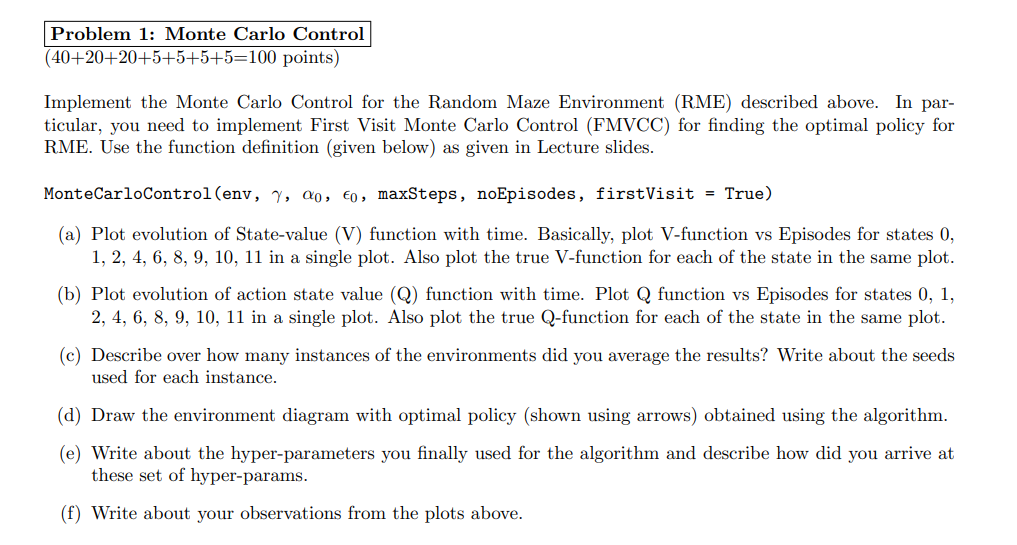

In [ ]:
def MonteCarloControl(env, gamma=0.99, alpha0=1, epsilon0=1, maxSteps=2000, noEpisodes=5000, firstVisit=True, gpr=False):
  Q = np.zeros(shape=(env.state_space_size, env.action_space_size))
  Q_s = np.zeros(shape=(noEpisodes, env.state_space_size, env.action_space_size))
  V=0
  visited = np.zeros((env.state_space_size,env.action_space_size))
  decayed_Alpha = decayAlpha(alpha0, decayType = "linear")
  decayed_Epsilon = decayAlpha(epsilon0,decayType="exponential")
  policy = random_policy
  data = []
  for e in range(noEpisodes):
    env.reset()
    alpha = decayed_Alpha(e)
    epsilon = decayed_Epsilon(e)
    t = generateTrajectory(env, policy = policy, epsilon=epsilon, maxSteps=maxSteps)
    visited[:,:]=False
    for i, exp_tuple in t:

      s = exp_tuple[0]
      a = action_map(exp_tuple[1])
      if visited[s,a]==True and firstVisit:
        continue
      else:
        visited[s,a] = True
      j=i
      G=0
      while j<=len(t):
        G = G + (gamma**(j-i))*t[j-1][1][2]
        j+=1
      Q[s,a] = Q[s,a] + alpha*(G-Q[s,a])
    Q_s[e] = Q[s,a]
    V=np.max(Q,axis=1)
    policy = GreedyPolicy(Q)
    if gpr==True:
      data.append((e,getPolicySuccessRate(env,policy)))

  return Q, V, policy, Q_s, data

MonteCarloControl(env)[2]

{0: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 1: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 2: {'Top': 0, 'Right': 1, 'Left': 0, 'Bottom': 0},
 3: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 4: {'Top': 0, 'Right': 0, 'Left': 0, 'Bottom': 1},
 5: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 6: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 7: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 8: {'Top': 0, 'Right': 1, 'Left': 0, 'Bottom': 0},
 9: {'Top': 0, 'Right': 0, 'Left': 1, 'Bottom': 0},
 10: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 11: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0}}

1-a, 1-b

Mean of Seeds:  507.34
Standard Deviation of Seeds 276.57032451078334


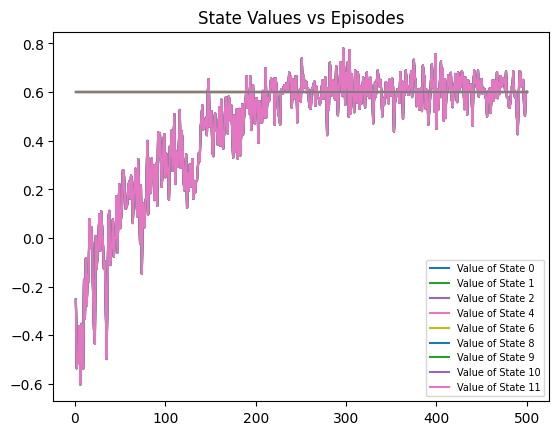

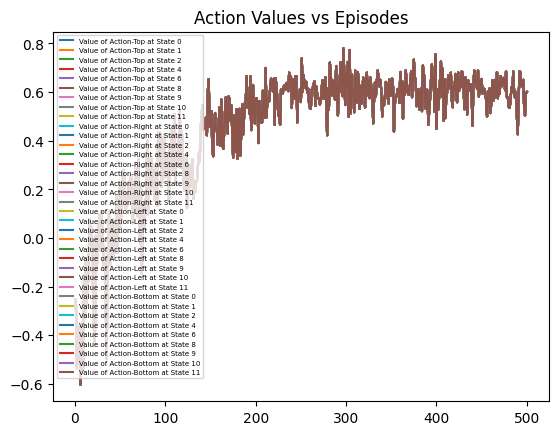

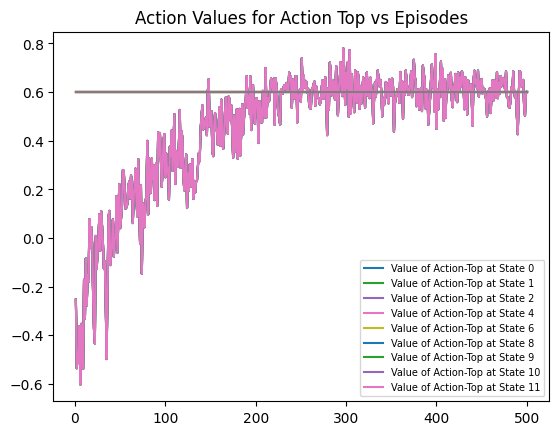

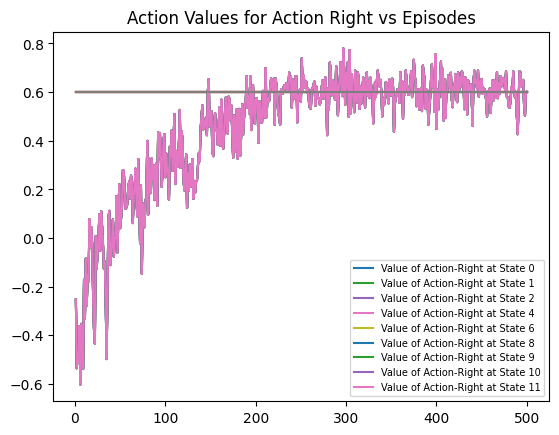

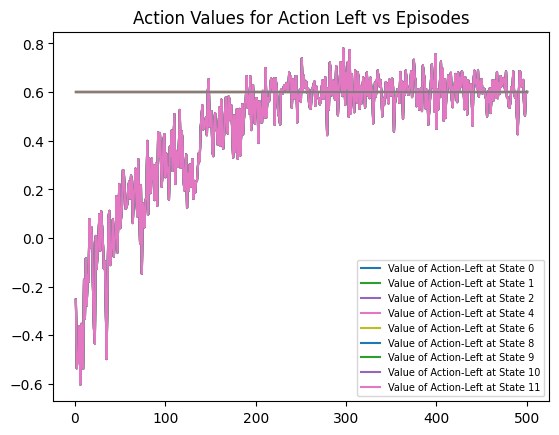

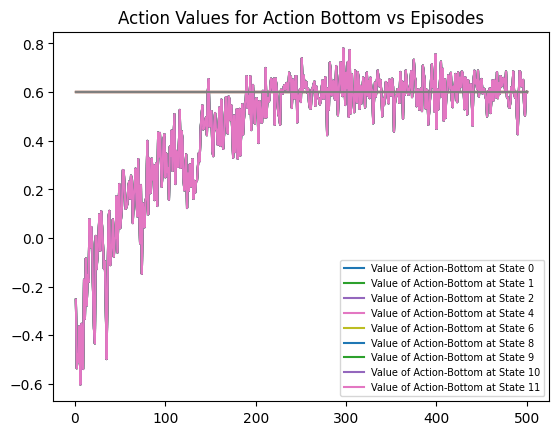

In [ ]:
def plotV(fun, n=50, noEpisodes=500):
  environments = []
  seeds = []
  for _ in range(n):
    seeds.append(random.randint(0,1000))
    environments.append(make('RME-v0', seeds[_]))
  V=0
  Q_s_avg=0

  def mean_var_stddev(seed):
    test_list = seed
    mean = np.sum(np.array(test_list)) / len(test_list)
    variance = np.sum(np.array([((x - mean) ** 2) for x in test_list])) / len(test_list)
    res = variance ** 0.5

    print("Mean of Seeds: ", mean)
    print("Standard Deviation of Seeds", res)
    return

  mean_var_stddev(seeds)
  for i in range(n):
    temp = environments[i]
    Qs = fun(temp, noEpisodes=noEpisodes)[3]
    V+=np.max(Qs,axis=2)
    Q_s_avg+=Qs

  V/=n
  Q_s_avg/=n
  Q=Q_s_avg
  e = np.array(range(noEpisodes))+1
  plt.figure()
  plt.plot(e, V[:,0], label="Value of State 0")
  plt.plot(e,V[-1,0]*np.ones(noEpisodes))
  plt.plot(e, V[:,1], label="Value of State 1")
  plt.plot(e,V[-1,1]*np.ones(noEpisodes))
  plt.plot(e, V[:,2], label="Value of State 2")
  plt.plot(e,V[-1,2]*np.ones(noEpisodes))
  plt.plot(e, V[:,4], label="Value of State 4")
  plt.plot(e,V[-1,4]*np.ones(noEpisodes))
  plt.plot(e, V[:,6], label="Value of State 6")
  plt.plot(e,V[-1,5]*np.ones(noEpisodes))
  plt.plot(e, V[:,8], label="Value of State 8")
  plt.plot(e,V[-1,8]*np.ones(noEpisodes))
  plt.plot(e, V[:,9], label="Value of State 9")
  plt.plot(e,V[-1,9]*np.ones(noEpisodes))
  plt.plot(e, V[:,10], label="Value of State 10")
  plt.plot(e,V[-1,10]*np.ones(noEpisodes))
  plt.plot(e, V[:,11], label="Value of State 11")
  plt.plot(e,V[-1,11]*np.ones(noEpisodes))
  plt.title("State Values vs Episodes")
  plt.legend(fontsize=7)
  plt.show()


  plt.figure()
  plt.plot(e, Q[:,0,0], label="Value of Action-Top at State 0")
  plt.plot(e, Q[:,1,0], label="Value of Action-Top at State 1")
  plt.plot(e, Q[:,2,0], label="Value of Action-Top at State 2")
  plt.plot(e, Q[:,4,0], label="Value of Action-Top at State 4")
  plt.plot(e, Q[:,6,0], label="Value of Action-Top at State 6")
  plt.plot(e, Q[:,8,0], label="Value of Action-Top at State 8")
  plt.plot(e, Q[:,9,0], label="Value of Action-Top at State 9")
  plt.plot(e, Q[:,10,0], label="Value of Action-Top at State 10")
  plt.plot(e, Q[:,11,0], label="Value of Action-Top at State 11")
  plt.plot(e, Q[:,0,1], label="Value of Action-Right at State 0")
  plt.plot(e, Q[:,1,1], label="Value of Action-Right at State 1")
  plt.plot(e, Q[:,2,1], label="Value of Action-Right at State 2")
  plt.plot(e, Q[:,4,1], label="Value of Action-Right at State 4")
  plt.plot(e, Q[:,6,1], label="Value of Action-Right at State 6")
  plt.plot(e, Q[:,8,1], label="Value of Action-Right at State 8")
  plt.plot(e, Q[:,9,1], label="Value of Action-Right at State 9")
  plt.plot(e, Q[:,10,1], label="Value of Action-Right at State 10")
  plt.plot(e, Q[:,11,1], label="Value of Action-Right at State 11")
  plt.plot(e, Q[:,0,2], label="Value of Action-Left at State 0")
  plt.plot(e, Q[:,1,2], label="Value of Action-Left at State 1")
  plt.plot(e, Q[:,2,2], label="Value of Action-Left at State 2")
  plt.plot(e, Q[:,4,2], label="Value of Action-Left at State 4")
  plt.plot(e, Q[:,6,2], label="Value of Action-Left at State 6")
  plt.plot(e, Q[:,8,2], label="Value of Action-Left at State 8")
  plt.plot(e, Q[:,9,2], label="Value of Action-Left at State 9")
  plt.plot(e, Q[:,10,2], label="Value of Action-Left at State 10")
  plt.plot(e, Q[:,11,2], label="Value of Action-Left at State 11")
  plt.plot(e, Q[:,0,3], label="Value of Action-Bottom at State 0")
  plt.plot(e, Q[:,1,3], label="Value of Action-Bottom at State 1")
  plt.plot(e, Q[:,2,3], label="Value of Action-Bottom at State 2")
  plt.plot(e, Q[:,4,3], label="Value of Action-Bottom at State 4")
  plt.plot(e, Q[:,6,3], label="Value of Action-Bottom at State 6")
  plt.plot(e, Q[:,8,3], label="Value of Action-Bottom at State 8")
  plt.plot(e, Q[:,9,3], label="Value of Action-Bottom at State 9")
  plt.plot(e, Q[:,10,3], label="Value of Action-Bottom at State 10")
  plt.plot(e, Q[:,11,3], label="Value of Action-Bottom at State 11")
  plt.title("Action Values vs Episodes")
  plt.legend(fontsize=5)
  plt.show()


  plt.figure()
  plt.plot(e, Q[:,0,0], label="Value of Action-Top at State 0")
  plt.plot(e,Q[-1,0,0]*np.ones(noEpisodes))
  plt.plot(e, Q[:,1,0], label="Value of Action-Top at State 1")
  plt.plot(e,Q[-1,1,0]*np.ones(noEpisodes))
  plt.plot(e, Q[:,2,0], label="Value of Action-Top at State 2")
  plt.plot(e,Q[-1,2,0]*np.ones(noEpisodes))
  plt.plot(e, Q[:,4,0], label="Value of Action-Top at State 4")
  plt.plot(e,Q[-1,4,0]*np.ones(noEpisodes))
  plt.plot(e, Q[:,6,0], label="Value of Action-Top at State 6")
  plt.plot(e,Q[-1,6,0]*np.ones(noEpisodes))
  plt.plot(e, Q[:,8,0], label="Value of Action-Top at State 8")
  plt.plot(e,Q[-1,8,0]*np.ones(noEpisodes))
  plt.plot(e, Q[:,9,0], label="Value of Action-Top at State 9")
  plt.plot(e,Q[-1,9,0]*np.ones(noEpisodes))
  plt.plot(e, Q[:,10,0], label="Value of Action-Top at State 10")
  plt.plot(e,Q[-1,10,0]*np.ones(noEpisodes))
  plt.plot(e, Q[:,11,0], label="Value of Action-Top at State 11")
  plt.plot(e,Q[-1,11,0]*np.ones(noEpisodes))
  plt.title("Action Values for Action Top vs Episodes")
  plt.legend(fontsize=7)
  plt.show()

  plt.figure()
  plt.plot(e, Q[:,0,1], label="Value of Action-Right at State 0")
  plt.plot(e,Q[-1,0,1]*np.ones(noEpisodes))
  plt.plot(e, Q[:,1,1], label="Value of Action-Right at State 1")
  plt.plot(e,Q[-1,1,1]*np.ones(noEpisodes))
  plt.plot(e, Q[:,2,1], label="Value of Action-Right at State 2")
  plt.plot(e,Q[-1,2,1]*np.ones(noEpisodes))
  plt.plot(e, Q[:,4,1], label="Value of Action-Right at State 4")
  plt.plot(e,Q[-1,4,1]*np.ones(noEpisodes))
  plt.plot(e, Q[:,6,1], label="Value of Action-Right at State 6")
  plt.plot(e,Q[-1,6,1]*np.ones(noEpisodes))
  plt.plot(e, Q[:,8,1], label="Value of Action-Right at State 8")
  plt.plot(e,Q[-1,8,1]*np.ones(noEpisodes))
  plt.plot(e, Q[:,9,1], label="Value of Action-Right at State 9")
  plt.plot(e,Q[-1,9,1]*np.ones(noEpisodes))
  plt.plot(e, Q[:,10,1], label="Value of Action-Right at State 10")
  plt.plot(e,Q[-1,10,1]*np.ones(noEpisodes))
  plt.plot(e, Q[:,11,1], label="Value of Action-Right at State 11")
  plt.plot(e,Q[-1,11,1]*np.ones(noEpisodes))
  plt.title("Action Values for Action Right vs Episodes")
  plt.legend(fontsize=7)
  plt.show()

  plt.figure()
  plt.plot(e, Q[:,0,2], label="Value of Action-Left at State 0")
  plt.plot(e,Q[-1,0,2]*np.ones(noEpisodes))
  plt.plot(e, Q[:,1,2], label="Value of Action-Left at State 1")
  plt.plot(e,Q[-1,1,2]*np.ones(noEpisodes))
  plt.plot(e, Q[:,2,2], label="Value of Action-Left at State 2")
  plt.plot(e,Q[-1,2,2]*np.ones(noEpisodes))
  plt.plot(e, Q[:,4,2], label="Value of Action-Left at State 4")
  plt.plot(e,Q[-1,4,2]*np.ones(noEpisodes))
  plt.plot(e, Q[:,6,2], label="Value of Action-Left at State 6")
  plt.plot(e,Q[-1,6,2]*np.ones(noEpisodes))
  plt.plot(e, Q[:,8,2], label="Value of Action-Left at State 8")
  plt.plot(e,Q[-1,8,2]*np.ones(noEpisodes))
  plt.plot(e, Q[:,9,2], label="Value of Action-Left at State 9")
  plt.plot(e,Q[-1,9,2]*np.ones(noEpisodes))
  plt.plot(e, Q[:,10,2], label="Value of Action-Left at State 10")
  plt.plot(e,Q[-1,10,2]*np.ones(noEpisodes))
  plt.plot(e, Q[:,11,2], label="Value of Action-Left at State 11")
  plt.plot(e,Q[-1,11,2]*np.ones(noEpisodes))
  plt.title("Action Values for Action Left vs Episodes")
  plt.legend(fontsize=7)
  plt.show()

  plt.figure()
  plt.plot(e, Q[:,0,3], label="Value of Action-Bottom at State 0")
  plt.plot(e,Q[-1,0,3]*np.ones(noEpisodes))
  plt.plot(e, Q[:,1,3], label="Value of Action-Bottom at State 1")
  plt.plot(e,Q[-1,1,3]*np.ones(noEpisodes))
  plt.plot(e, Q[:,2,3], label="Value of Action-Bottom at State 2")
  plt.plot(e,Q[-1,2,3]*np.ones(noEpisodes))
  plt.plot(e, Q[:,4,3], label="Value of Action-Bottom at State 4")
  plt.plot(e,Q[-1,4,3]*np.ones(noEpisodes))
  plt.plot(e, Q[:,6,3], label="Value of Action-Bottom at State 6")
  plt.plot(e,Q[-1,6,3]*np.ones(noEpisodes))
  plt.plot(e, Q[:,8,3], label="Value of Action-Bottom at State 8")
  plt.plot(e,Q[-1,8,3]*np.ones(noEpisodes))
  plt.plot(e, Q[:,9,3], label="Value of Action-Bottom at State 9")
  plt.plot(e,Q[-1,9,3]*np.ones(noEpisodes))
  plt.plot(e, Q[:,10,3], label="Value of Action-Bottom at State 10")
  plt.plot(e,Q[-1,10,3]*np.ones(noEpisodes))
  plt.plot(e, Q[:,11,3], label="Value of Action-Bottom at State 11")
  plt.plot(e,Q[-1,11,3]*np.ones(noEpisodes))
  plt.title("Action Values for Action Bottom vs Episodes")
  plt.legend(fontsize=7)
  plt.show()


  return


plotV(MonteCarloControl)

1-c.

Here 50 instances of the environment have been used to average over the state values. The values of the
seeds are randomly chosen from 0 to 1000 and the average of the seeds used in the plots is 525.48 and the standard deviation is 288.27

1-d

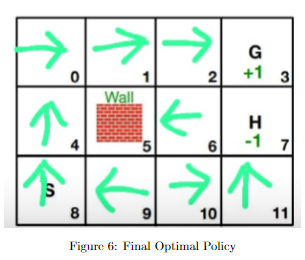

1-e

Hyperparameters used:  alpha=1, epsilon=1, gamma=0.99

1-f

From the above graphs we can observe that the Final State-Action values for the Monte Carlo Control
are approximately the same due to which we see a single curve because the curves overlap each other

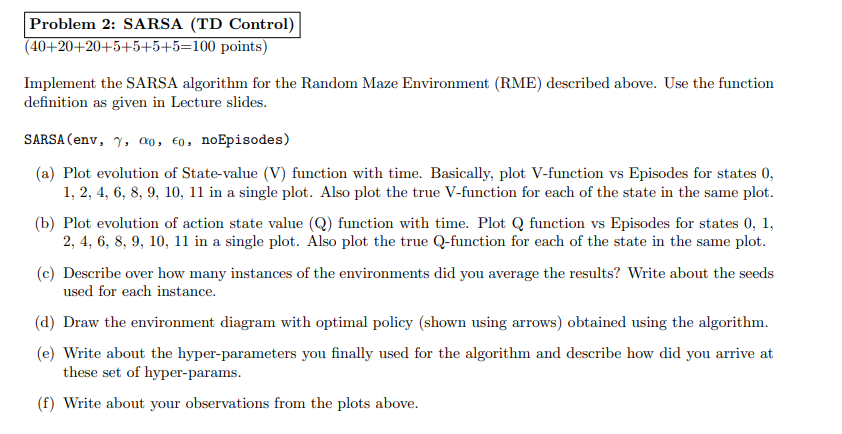

In [ ]:
def SARSA(env, gamma=0.99, alpha=1, epsilon=1, noEpisodes=5000):
  Q = np.zeros(shape=(env.state_space_size, env.action_space_size))
  Q_s = np.zeros(shape=(noEpisodes, env.state_space_size, env.action_space_size))
  decayed_Alpha = decayAlpha(alpha, decayType = "linear")
  decayed_Epsilon = decayAlpha(epsilon,decayType="exponential")
  policy = random_policy
  for e in range(noEpisodes):
    alpha = decayed_Alpha(e)
    epsilon = decayed_Epsilon(e)
    s = env.reset()[0]["agent"]
    done = False
    a = actionSelect(s,Q,epsilon)
    while not done:
      ns, r, terminated, truncated, info = env.step(a)
      ns = ns["agent"]
      done = terminated
      td_target = r
      na = actionSelect(ns,Q,epsilon)
      td_target = r
      if not done:
        td_target = td_target+gamma*Q[ns,action_map(na)]
      td_error = td_target-Q[s,action_map(a)]
      Q[s,action_map(a)] = Q[s,action_map(a)]+alpha*td_error
      s=ns
      a=na
    Q_s[e] = Q
    V=np.max(Q,axis=1)
    policy = GreedyPolicy(Q)

  return Q, V, policy, Q_s

SARSA(env)[2]

{0: {'Top': 0, 'Right': 1, 'Left': 0, 'Bottom': 0},
 1: {'Top': 0, 'Right': 1, 'Left': 0, 'Bottom': 0},
 2: {'Top': 0, 'Right': 1, 'Left': 0, 'Bottom': 0},
 3: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 4: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 5: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 6: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 7: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 8: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 9: {'Top': 0, 'Right': 1, 'Left': 0, 'Bottom': 0},
 10: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0},
 11: {'Top': 1, 'Right': 0, 'Left': 0, 'Bottom': 0}}

Mean of Seeds:  531.96
Standard Deviation of Seeds 253.175904066718


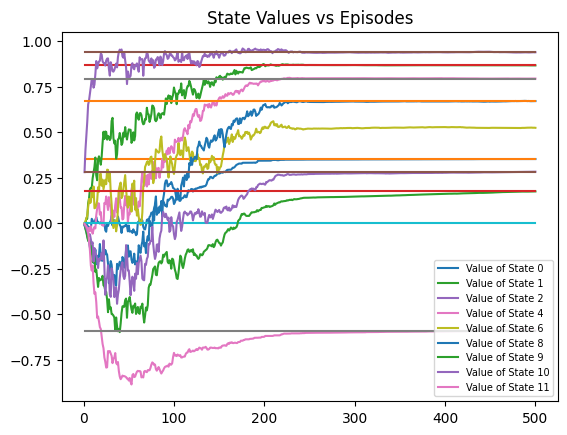

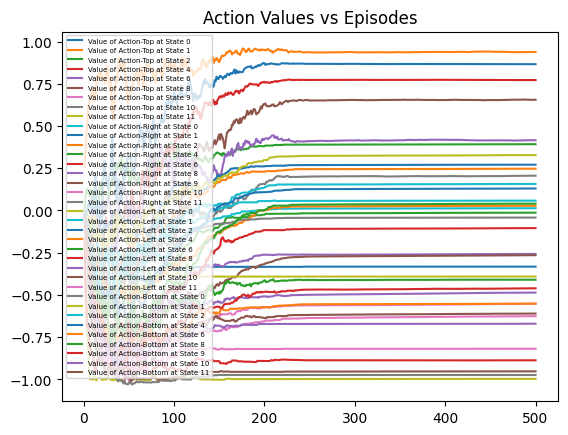

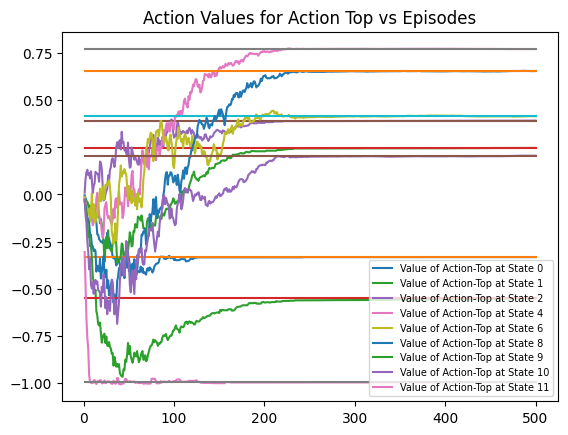

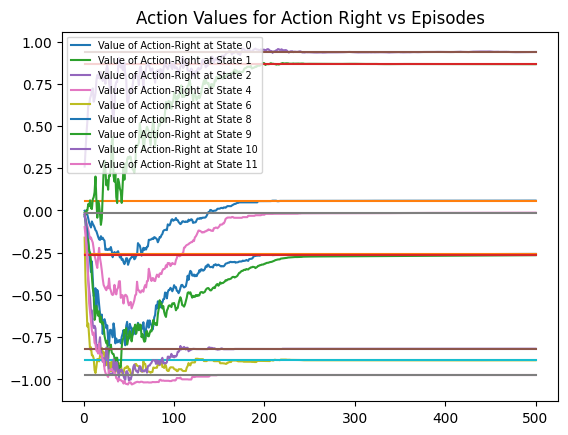

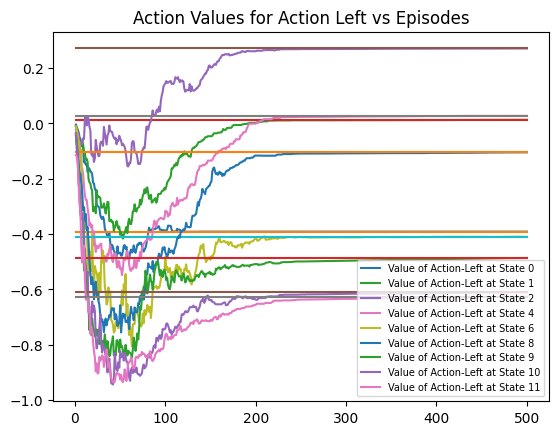

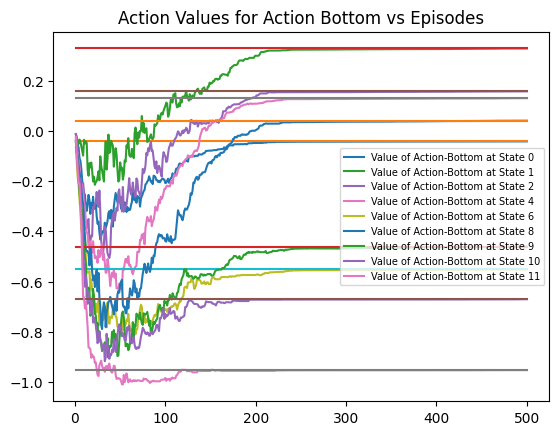

In [ ]:
plotV(SARSA)

2-c

Here 50 instances of the environment have been used to average over the state values. The values of the seeds are randomly chosen from 0 to 1000 and the average of the seeds used in the plots is 531.96 and the standard deviation is 253.17

2-d

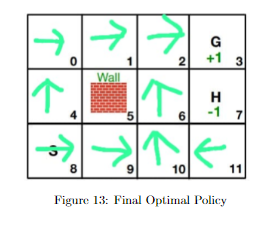

2-e

Hyperparameters used:  alpha=1, epsilon=1, gamma=0.99

2-f

From the above graphs we can observe that: v\*(2)>v\*(1)>v\*(4)>v\*(8)>v\*(6)>v\*(0)>v\*(10)>v\*(9)>v\*(11)

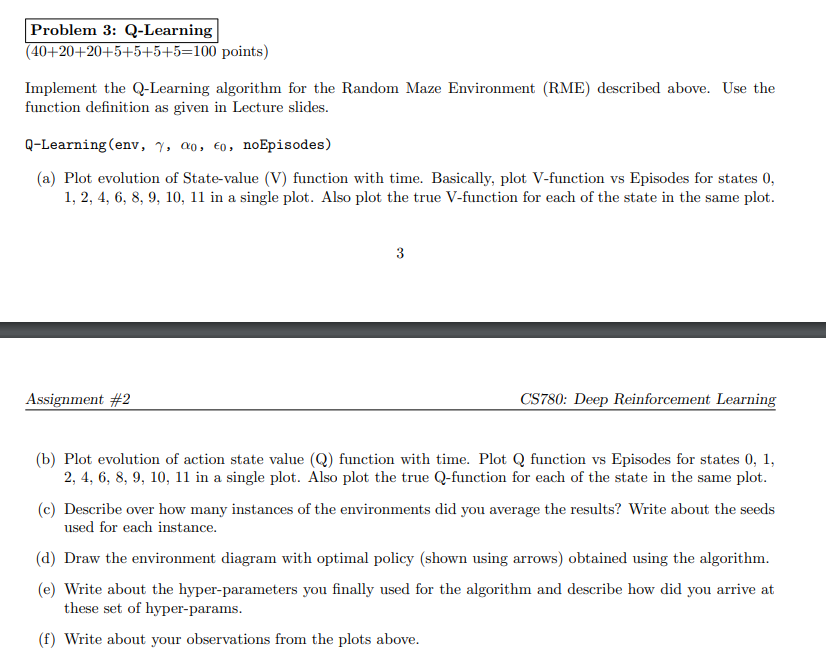

In [ ]:
def Q_learning(env, gamma=0.99,alpha=1, epsilon=1, noEpisodes=5000):
  Q = np.zeros(shape=(env.state_space_size,env.action_space_size))
  Q_s = np.zeros(shape=(noEpisodes, env.state_space_size, env.action_space_size))
  decayed_Alpha = decayAlpha(alpha, decayType = "linear")
  decayed_Epsilon = decayAlpha(epsilon,decayType="exponential")
  policy = random_policy
  for e in range(noEpisodes):
    alpha = decayed_Alpha(e)
    epsilon = decayed_Epsilon(e)
    s = env.reset()[0]["agent"]
    done = False
    while not done:
      a = actionSelect(s,Q,epsilon)
      ns, r, terminated, truncated, info = env.step(a)
      ns = ns["agent"]
      done = terminated
      td_target = r
      if not done:
        td_target = td_target+gamma*(np.max(Q[ns,:]))
      td_error = td_target - Q[s,action_map(a)]
      Q[s,action_map(a)] = Q[s,action_map(a)]+alpha*td_error
      s = ns
    Q_s[e] = Q
    V = np.max(Q,axis=1)
    policy = GreedyPolicy(Q)

  return Q, V, policy, Q_s

Q_learning(env)

(array([[ 0.52751143,  0.62544525,  0.5485429 ,  0.77417895],
        [ 0.66346693,  0.89269397,  0.57003284,  0.79762768],
        [ 0.72421867,  0.9535536 ,  0.68747664,  0.529055  ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.83589576,  0.58360894,  0.6190902 ,  0.62027792],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.6506862 , -0.93989394,  0.25283479,  0.03394088],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.74143243,  0.26519985,  0.36625875,  0.48365478],
        [ 0.19423802,  0.49499286,  0.13250847,  0.20337167],
        [ 0.56119363,  0.09243183,  0.14680203,  0.1628933 ],
        [-0.94961963, -0.33844473,  0.23157764, -0.05137239]]),
 array([0.77417895, 0.89269397, 0.9535536 , 0.        , 0.83589576,
        0.        , 0.6506862 , 0.        , 0.74143243, 0.49499286,
        0.56119363, 0.23157764]),
 {0: {'Top': 0, 'Right': 0, 'Left': 0, 'Bottom': 1},
  1: {'Top': 0, 'Right': 1, 'Le

Mean of Seeds:  453.2
Standard Deviation of Seeds 290.6609708922063


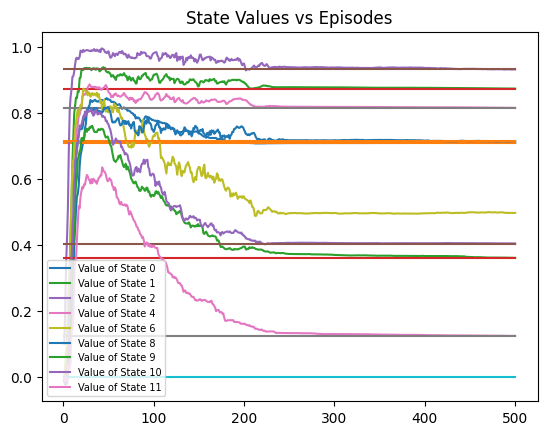

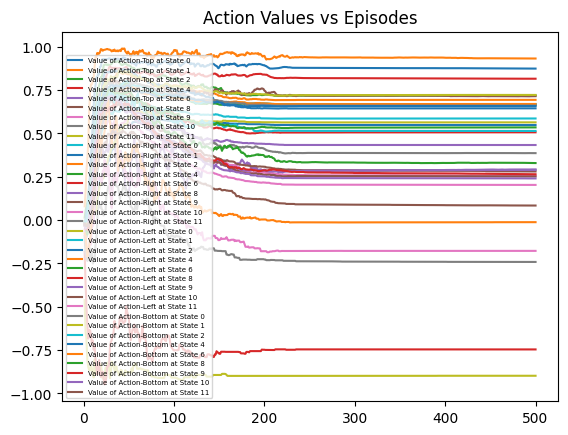

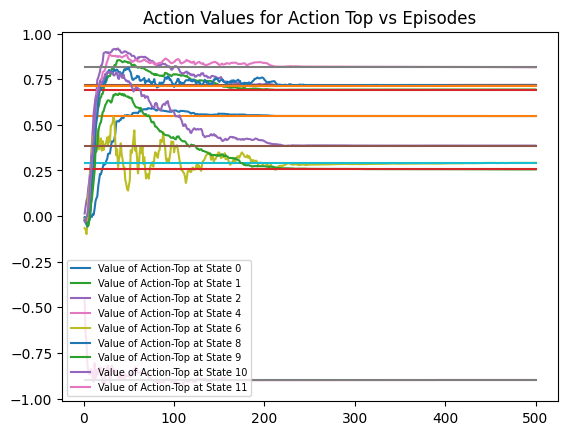

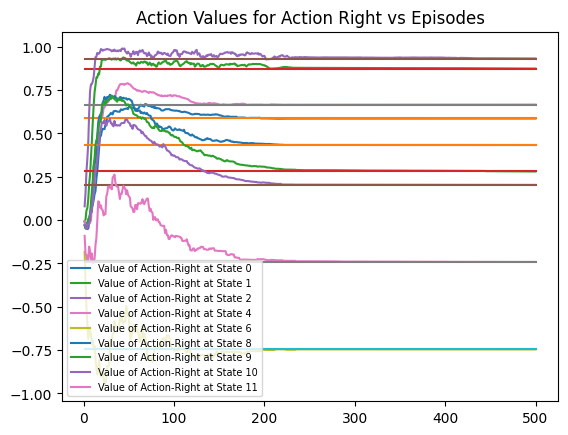

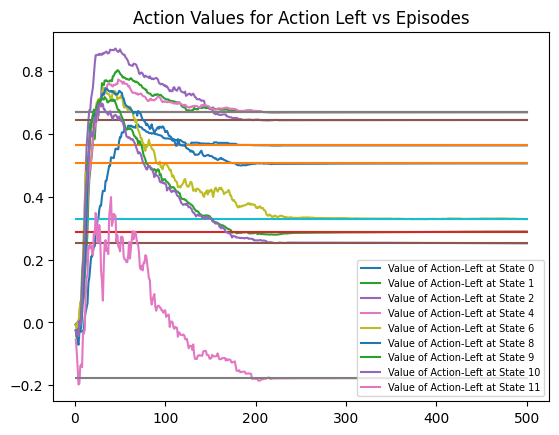

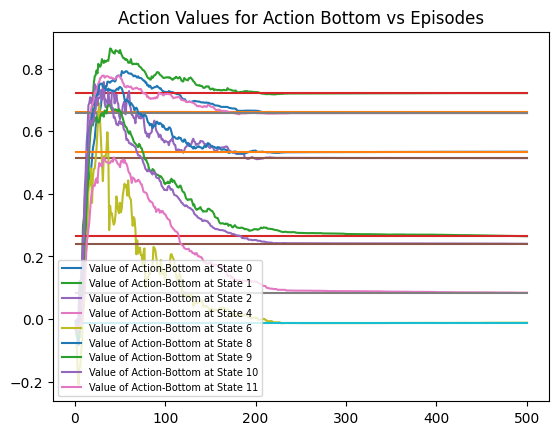

In [ ]:
plotV(Q_learning)

3-c

Here 50 instances of the environment have been used to average over the state values. The values of the seeds are randomly chosen from 0 to 1000 and the average of the seeds used in the plots is 453.2 and the standard deviation is 290.66

3-d

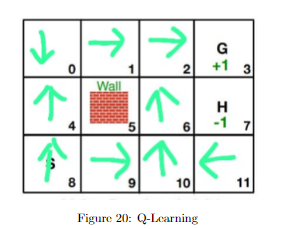

3-e

Hyperparameters used:  alpha=1, epsilon=1, gamma=0.99

3-f

We observe that: v\*(2)>v\*(1)>v\*(4)>v\*(8)>v\*(0)>v\*(6)>v\*(10)>v\*(9)>v\*(11)

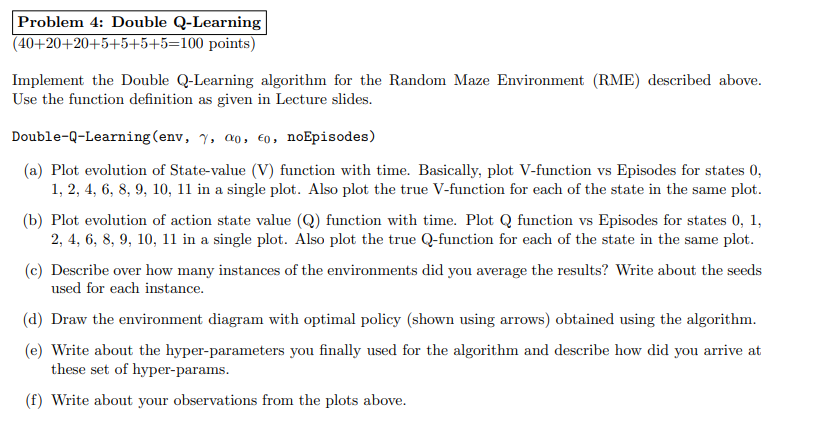

In [ ]:
def double_Q_Learning(env,gamma=0.99,alpha=1,epsilon=1,noEpisodes=500):
  Q1 = np.zeros(shape=(env.state_space_size,env.action_space_size))
  Q2 = np.zeros(shape=(env.state_space_size,env.action_space_size))
  Qs1 = np.zeros(shape=(noEpisodes,env.state_space_size,env.action_space_size))
  Qs2 = np.zeros(shape=Qs1.shape)
  Q=(Q1+Q2)/2
  Q_s = (Qs1+Qs2)/2
  decayed_Alpha = decayAlpha(alpha, decayType = "linear")
  decayed_Epsilon = decayAlpha(epsilon,decayType="exponential")
  policy = random_policy
  for e in range(noEpisodes):
    alpha = decayed_Alpha(e)
    epsilon = decayed_Epsilon(e)
    s = env.reset()[0]["agent"]
    done = False

    while not done:
      a = actionSelect(s,Q,epsilon)
      ns, r, terminated, truncated, info = env.step(a)
      ns = ns["agent"]
      done = terminated
      if random.randint(0,2):
        a1 = action_map(np.argmax(Q1[ns]))
        td_target = r
        if not done:
          td_target += gamma*Q2[ns,action_map(a1)]
        td_error = td_target-Q1[s,action_map(a)]
        Q1[s,action_map(a)] = Q1[s,action_map(a)]+alpha*(td_error)
      else:
        a2 = action_map(np.argmax(Q2[ns,:]))
        td_target = r
        if not done:
          td_target += gamma*Q1[ns,action_map(a2)]
        td_error = td_target-Q2[s,action_map(a)]
        Q2[s,action_map(a)] = Q2[s,action_map(a)]+alpha*(td_error)

      s = ns
    Qs1[e] = Q1
    Qs2[e] = Q2
    Q = (Q1+Q2)/2
    Q_s = (Qs1+Qs2)/2
    V = np.max(Q,axis=1)
    policy = GreedyPolicy(Q)

  return Q, V, policy, Q_s


double_Q_Learning(env)

(array([[-0.05977606, -0.0404433 , -0.03333671,  0.07362589],
        [ 0.25298292,  0.63624359, -0.1013668 ,  0.23042056],
        [ 0.49909355,  0.88868267,  0.52639816,  0.55181608],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.40221445,  0.14689529,  0.01707099,  0.08037141],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.28868966, -0.90610446, -0.36754493, -0.6027375 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.15774887, -0.30602852, -0.26563696, -0.25709404],
        [-0.59808023, -0.46930297, -0.4928738 , -0.61239973],
        [-0.08276206, -1.08408305, -0.486124  , -0.43133698],
        [-0.93634889, -1.07127606, -1.00423106, -1.07023284]]),
 array([ 0.07362589,  0.63624359,  0.88868267,  0.        ,  0.40221445,
         0.        ,  0.28868966,  0.        ,  0.15774887, -0.46930297,
        -0.08276206, -0.93634889]),
 {0: {'Top': 0, 'Right': 0, 'Left': 0, 'Bottom': 1},
  1: {'Top': 0, 'Ri

Mean of Seeds:  493.46
Standard Deviation of Seeds 311.14595996091606


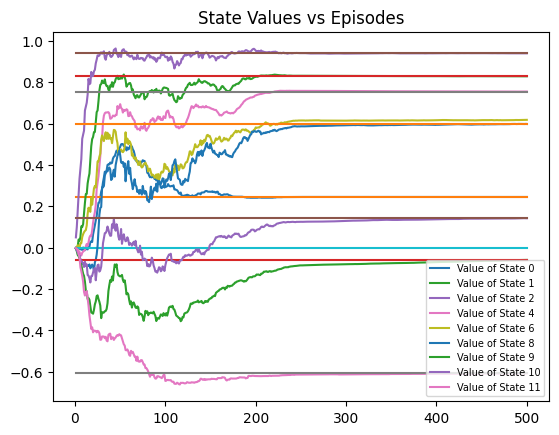

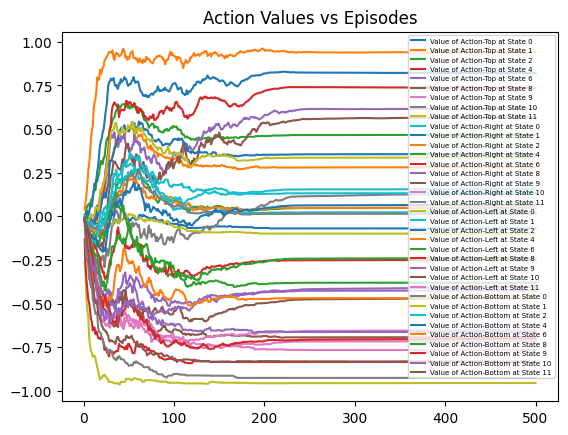

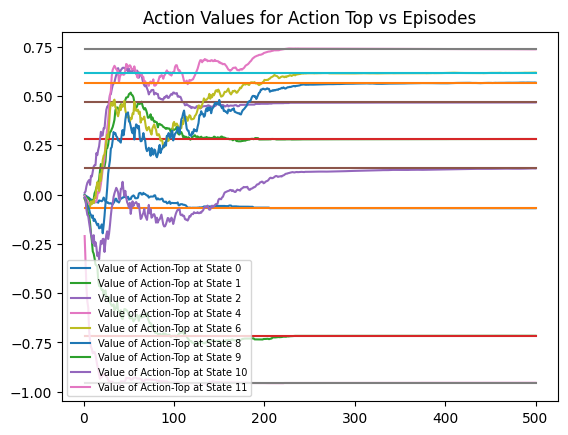

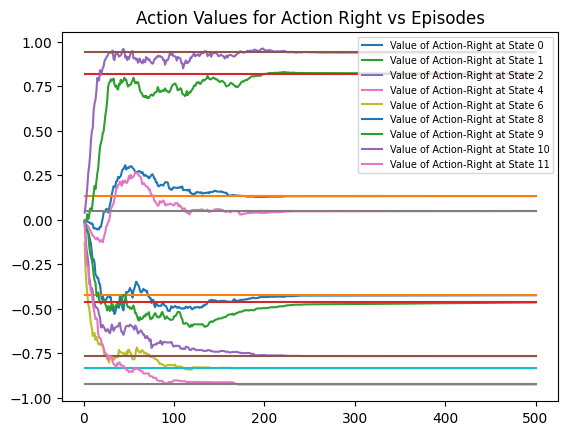

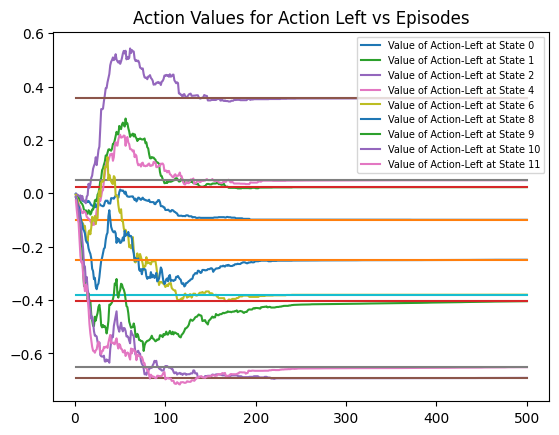

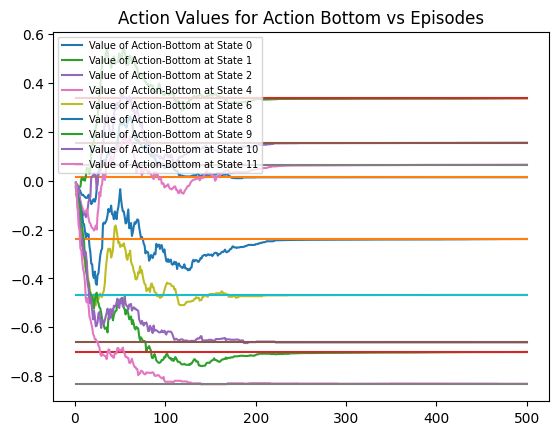

In [ ]:
plotV(double_Q_Learning)

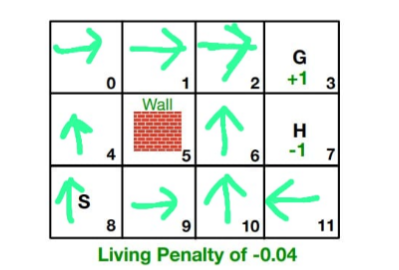

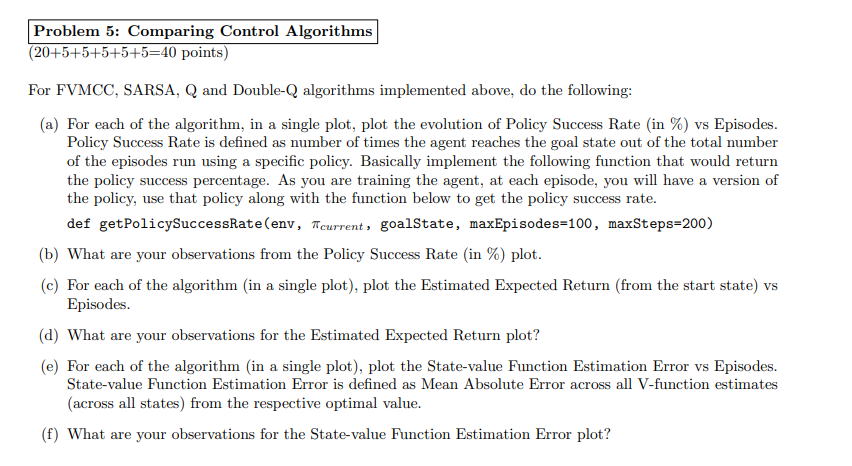

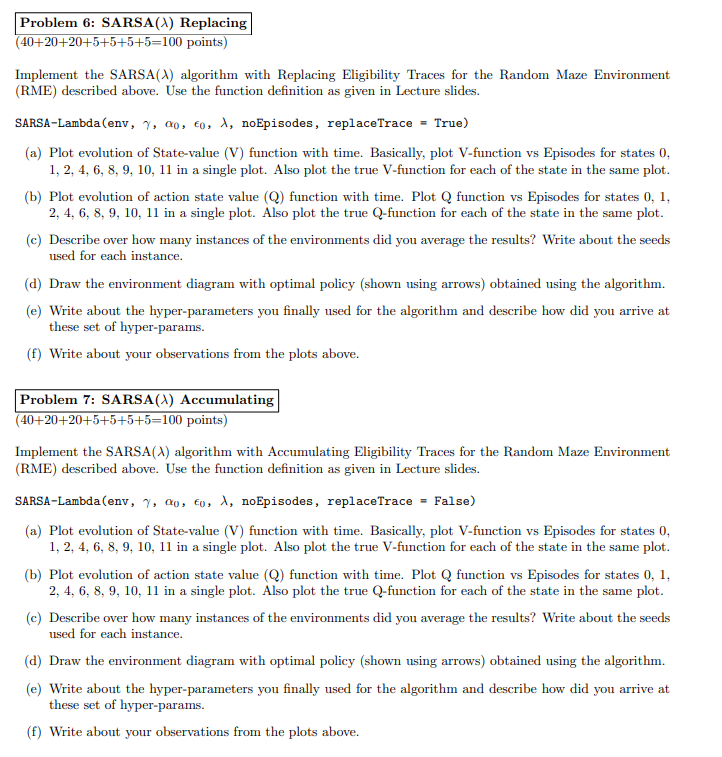

In [ ]:
def SARSA_lambda(env,gamma=0.99,alpha=1,epsilon=1,lamda=0.5,noEpisodes=500,replaceTrace=False):
  Q = np.zeros(shape = (env.state_space_size,env.action_space_size))
  Q_s = np.zeros(shape=(noEpisodes, env.state_space_size, env.action_space_size))
  E = np.zeros(shape = (env.state_space_size,env.action_space_size))
  decayed_Alpha = decayAlpha(alpha, decayType = "linear")
  decayed_Epsilon = decayAlpha(epsilon,decayType="exponential")
  policy = random_policy
  for e in range(noEpisodes):
    alpha = decayed_Alpha(e)
    epsilon = decayed_Epsilon(e)
    E = np.zeros(shape=Q.shape)
    s = env.reset()[0]["agent"]
    done = False

    a = actionSelect(s,Q,epsilon)
    while not done:
      ns, r, terminated, truncated, info = env.step(a)
      ns = ns["agent"]
      done = terminated
      na = actionSelect(ns,Q,epsilon)
      td_target = r
      if not done:
        td_target += gamma*Q[ns,action_map(na)]
      td_error = td_target-Q[s,action_map(a)]
      if replaceTrace:
        E[s]=np.zeros(env.action_space_size)
      E[s,action_map(a)] += 1
      Q+=alpha*td_error*E
      E=gamma*lamda*E
      s=ns
      a=na
    Q_s[e] = Q
    V = np.max(Q,axis=1)
    policy = GreedyPolicy(Q)

  return Q, V, policy, Q_s


SARSA_lambda(env)

(array([[-0.22234158, -0.24472587, -0.20752935,  0.67727879],
        [-0.01570741,  0.89050677,  0.52207031,  0.75290116],
        [ 0.7185614 ,  0.94472858,  0.64360982,  0.51463866],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.83361298,  0.48352252,  0.15493864,  0.49641923],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.53196834, -0.91066668, -0.37326412, -0.53004531],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.74482815, -0.0124609 ,  0.20785305,  0.36641294],
        [ 0.08627123, -0.55717016,  0.06218091,  0.28104981],
        [ 0.42300092, -0.66614703, -0.57030007, -0.67342352],
        [-0.75402944, -0.83664699, -0.25681044, -0.44209248]]),
 array([ 0.67727879,  0.89050677,  0.94472858,  0.        ,  0.83361298,
         0.        ,  0.53196834,  0.        ,  0.74482815,  0.28104981,
         0.42300092, -0.25681044]),
 {0: {'Top': 0, 'Right': 0, 'Left': 0, 'Bottom': 1},
  1: {'Top': 0, 'Ri

Mean of Seeds:  503.3
Standard Deviation of Seeds 309.6791404018036


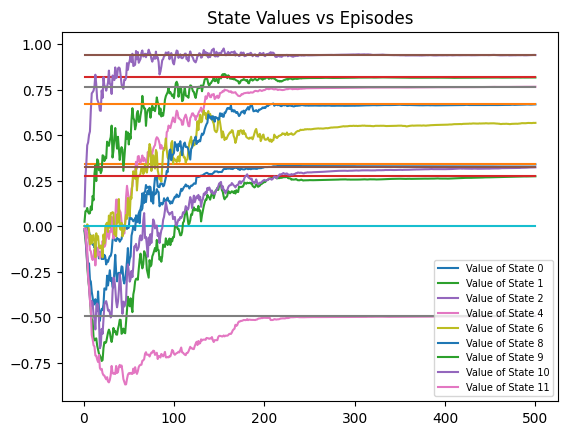

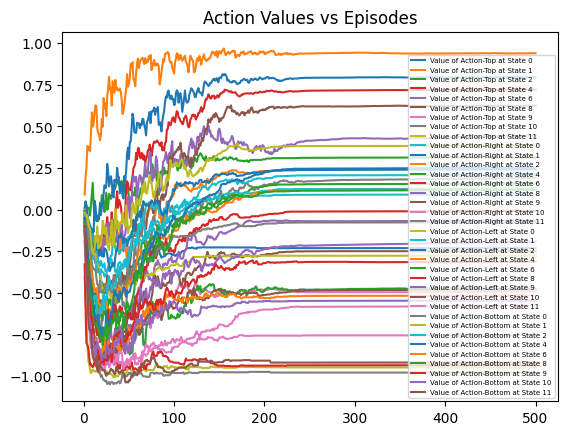

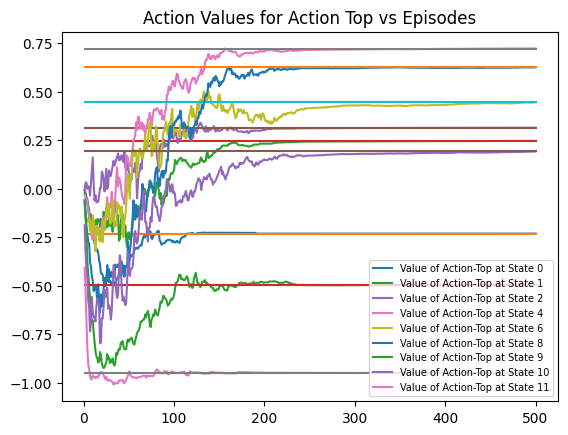

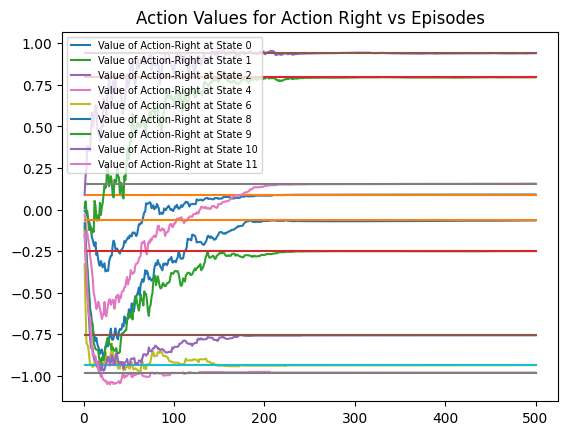

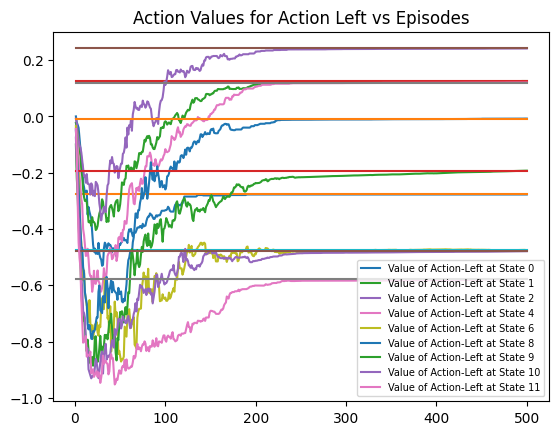

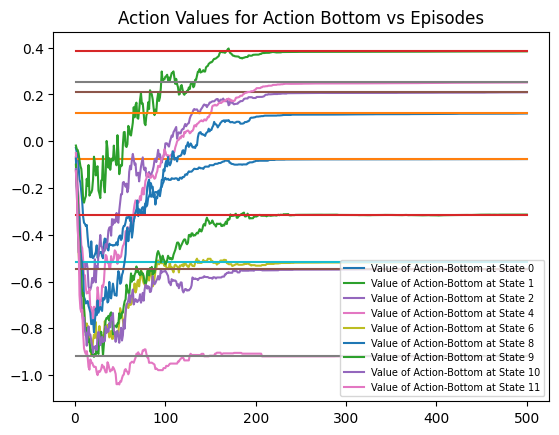

In [ ]:
plotV(SARSA_lambda)

Final Policy for SARSA lambda

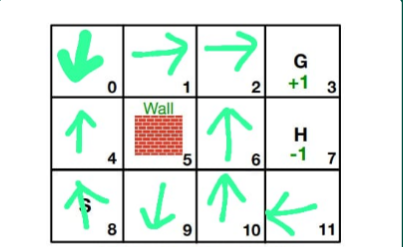

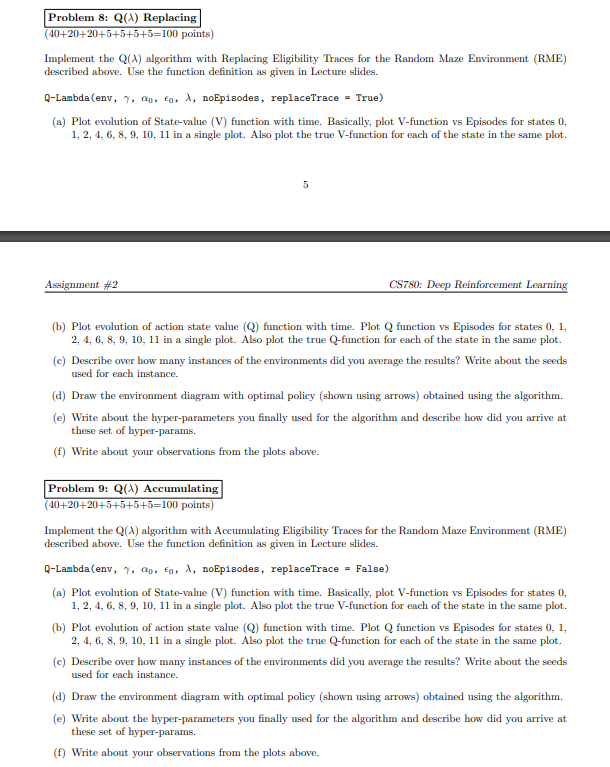

In [ ]:
def Q_lambda(env,gamma=0.99,alpha=1,epsilon=1,lamda=0.5,noEpisodes=500,replaceTrace=True):
  Q = np.zeros(shape = (env.state_space_size,env.action_space_size))
  Q_s = np.zeros(shape=(noEpisodes, env.state_space_size, env.action_space_size))
  E = np.zeros(shape = (env.state_space_size,env.action_space_size))
  decayed_Alpha = decayAlpha(alpha, decayType = "linear")
  decayed_Epsilon = decayAlpha(epsilon,decayType="exponential")
  policy = random_policy
  for e in range(noEpisodes):
    alpha = decayed_Alpha(e)
    epsilon = decayed_Epsilon(e)
    E = np.zeros(shape=Q.shape)
    s = env.reset()[0]["agent"]
    done = False
    a = actionSelect(s,Q,epsilon)
    while not done:
      ns, r, terminated, truncated, info = env.step(a)
      ns = ns["agent"]
      done = terminated
      na = actionSelect(ns,Q,epsilon)
      if Q[ns,action_map(na)]==np.max(Q[ns,:]):
        ns_greedy = True
      else:
        ns_greedy = False
      td_target=r
      if not done:
        td_target+=gamma*(np.max(Q[ns,:]))
      td_error = td_target-Q[s,action_map(a)]
      if replaceTrace:
        E[s] = np.zeros(env.action_space_size)
      E[s,action_map(a)]+=1
      Q+=alpha*td_error*E
      if ns_greedy:
        E = gamma*lamda*E
      else:
        E=np.zeros(shape = (env.state_space_size,env.action_space_size))
      s = ns
      a = na
    Q_s[e] = Q
  V = np.max(Q,axis=1)
  policy = GreedyPolicy(Q)

  return Q, V, policy, Q_s

Q_lambda(env, replaceTrace=False)

(array([[ 6.34959182e-01,  6.26601278e-01,  0.00000000e+00,
          6.29030694e-01],
        [ 6.83828086e-01,  8.87862554e-01,  6.18735064e-01,
          6.47656931e-01],
        [ 6.33254330e-01,  9.52829506e-01,  6.27127765e-01,
          5.33843997e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 8.30904903e-01,  6.57905255e-01,  6.06138271e-01,
          6.75933923e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 5.12032371e-01, -9.99999983e-01,  5.83782265e-01,
         -1.83980391e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [ 7.36498034e-01,  2.79193533e-01,  4.51835870e-01,
          4.60578035e-01],
        [ 2.23588767e-02, -1.08784723e-03,  5.34463904e-01,
          2.15567608e-01],
        [ 5.51500151e-01, -4.26810467e-04,  1.13161492e-02,
         -2.16179067e-02],
        [-8.87813923e-01, -6.62440868e-01, 

Mean of Seeds:  438.2
Standard Deviation of Seeds 293.28723122563656


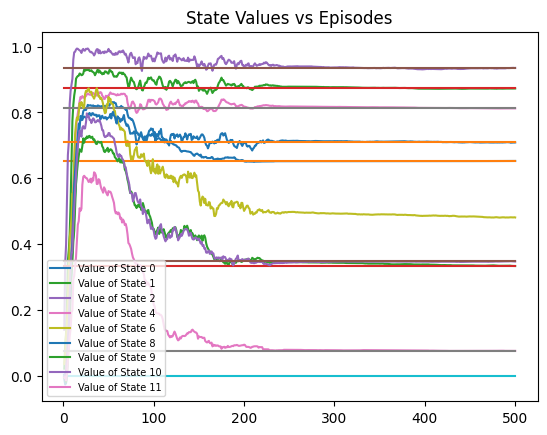

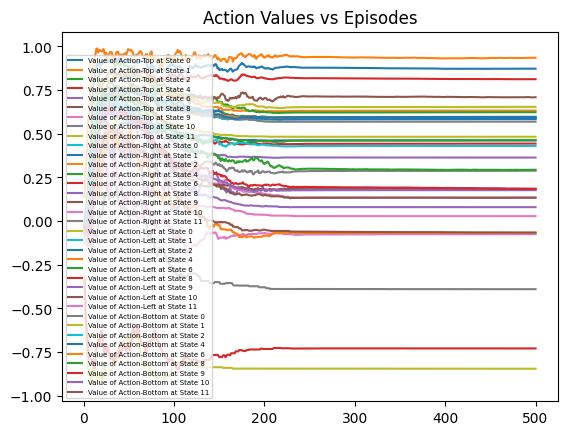

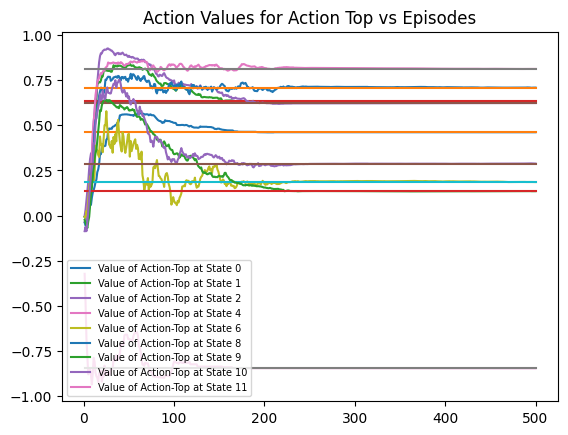

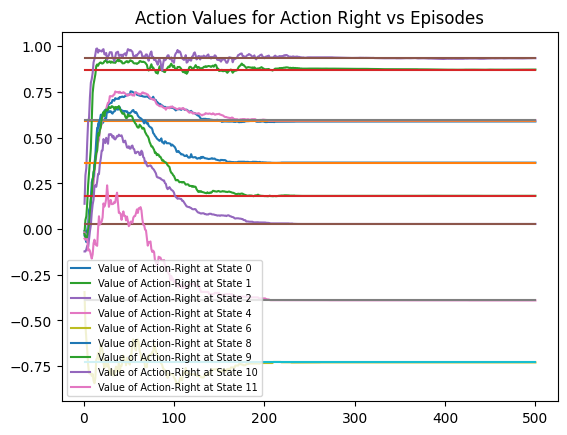

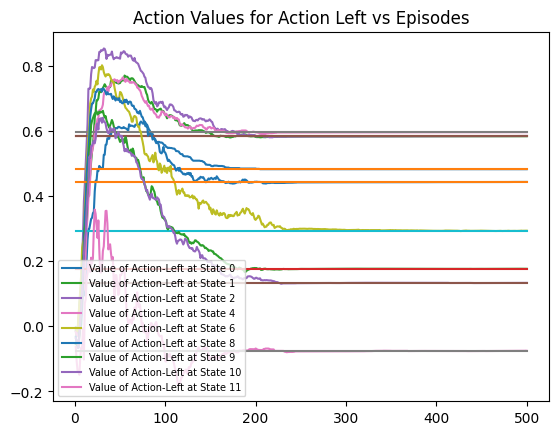

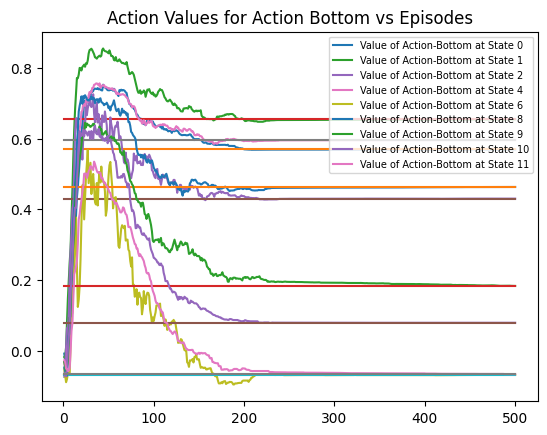

In [ ]:
plotV(Q_lambda)

Final Policy for Q_lambda

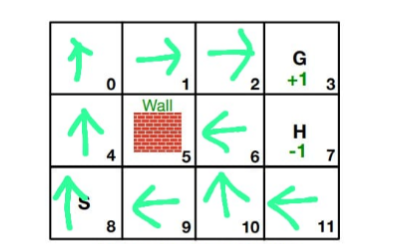

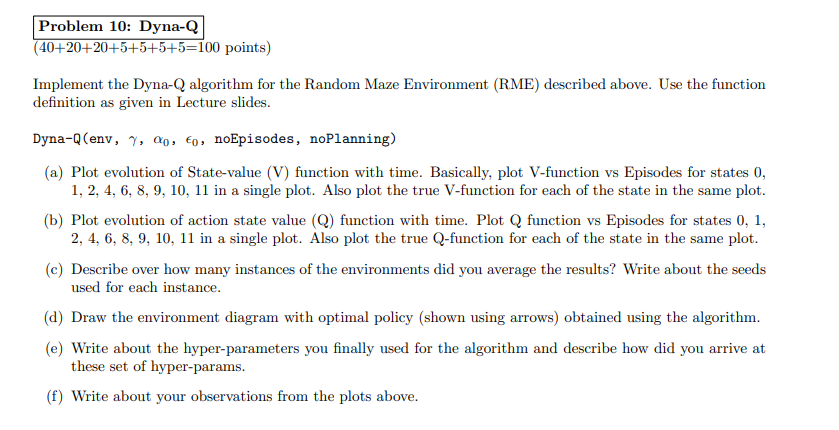

In [ ]:
def dyna_Q(env, gamma, alpha, epsilon, noEpisodes, noPlanning):
  Q = np.zeros(shape = (env.state_space_size,env.action_space_size))
  Q_s = np.zeros(shape=(noEpisodes, env.state_space_size, env.action_space_size))
  T = np.zeros(shape=(env.state_space_size,env.action_space_size, env.state_space_size))
  R = np.zeros(shape=(env.state_space_size,env.action_space_size, env.state_space_size))
  decayed_Alpha = decayAlpha(alpha, decayType = "linear")
  decayed_Epsilon = decayAlpha(epsilon,decayType="exponential")
  policy = random_policy
  for e in range(noEpisodes):
    alpha = decayed_Alpha(e)
    epsilon = decayed_Epsilon(e)
    E = np.zeros(shape=Q.shape())
    s = env.reset()[0]["agent"]
    done = False
    while not done:
      a = actionSelect(s,Q,epsilon)
      ns, r, terminated, truncated, info = env.step(a)
      ns = ns["agent"]
      done = terminated
      T[s,a,ns]+=1
      rDiff = r - R[s,a,ns]
      R[s,a,ns]+=rDiff/T[s,a,ns]
      td_target=r
      if not done:
        td_target+=gamma(np.max(Q[ns,:]))
      td_error = td_target-Q[s,a]
      Q[s,a]+=alpha*td_error
      s_backup = ns
      for _ in range(noPlanning):
        if np.sum(Q)==0:
          break







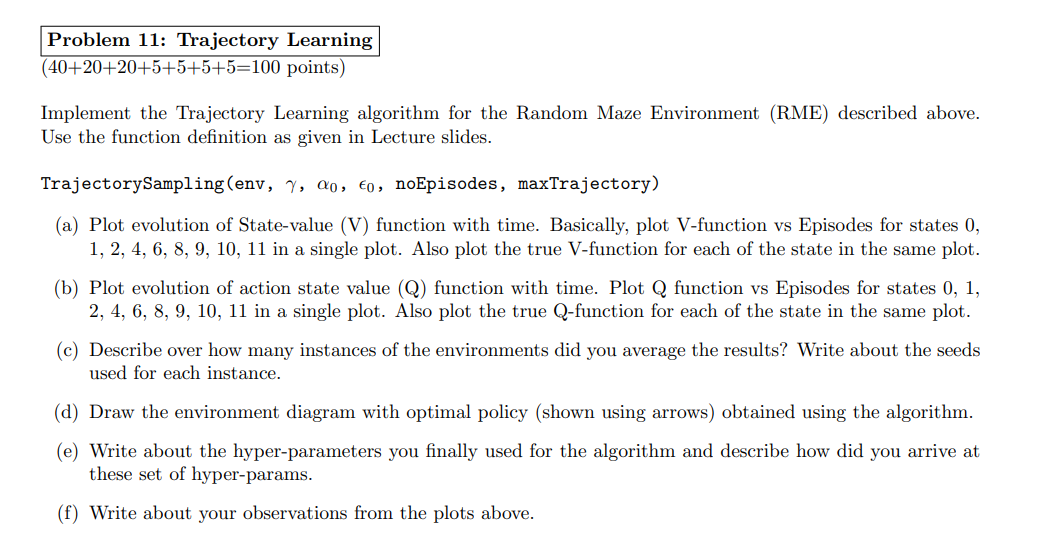

In [ ]:
def TrajectorySampling(env, gamma=0.99, alpha=1,epsilon=1, noEpisodes=500, maxTrajectory=100):
  Q = np.zeros(shape = (env.state_space_size,env.action_space_size))
  Q_s = np.zeros(shape=(noEpisodes, env.state_space_size, env.action_space_size))
  T = np.zeros(shape=(env.state_space_size,env.action_space_size, env.state_space_size))
  R = np.zeros(shape=(env.state_space_size,env.action_space_size, env.state_space_size))
  decayed_Alpha = decayAlpha(alpha, decayType = "linear")
  decayed_Epsilon = decayAlpha(epsilon,decayType="exponential")
  policy = random_policy
  for e in range(noEpisodes):
    alpha = decayed_Alpha(e)
    epsilon = decayed_Epsilon(e)
    E = np.zeros(shape=Q.shape)
    s = env.reset()[0]["agent"]
    done = False
    while not done:
      a = actionSelect(s,Q,epsilon)
      ns, r, terminated, truncated, info = env.step(a)
      ns = ns["agent"]
      done = terminated
      T[s,action_map(a),ns] += 1
      rDiff = r-R[s,action_map(a),ns]
      R[s,action_map(a),ns] += rDiff/T[s,action_map(a),ns]
      td_target = r
      if not done:
        td_target+=gamma*np.max(Q[ns,:])
      td_error = td_target-Q[s,action_map(a)]
      Q[s,action_map(a)]+=alpha*td_error
      s_backup = ns
      for _ in range(maxTrajectory):
        if np.sum(Q)==0:
          break
        a = actionSelect(s,Q,epsilon)
        if not np.sum(T[s,action_map(a),:]):
          break
        prob_ns = T[s,action_map(a),:]/np.sum(T[s,action_map(a),:])
        ns = random.choices(env.state_space, weights=prob_ns,k=1)[0]
        r = R[s,action_map(a),ns]
        td_target = r+gamma*np.max(Q[ns,:])
        td_error = td_target-Q[s,action_map(a)]
        Q[s,action_map(a)]+=alpha*td_error
        s=ns
      s=s_backup
    Q_s[e] = Q
  V = np.max(Q,axis=1)
  policy = GreedyPolicy(Q)

  return Q,V,policy,Q_s

TrajectorySampling(env)

(array([[ 0.61358951,  0.81837437,  0.67975612,  0.67639284],
        [ 0.81303369,  0.90102321,  0.68218864,  0.80829124],
        [ 0.83033308,  0.95343993,  0.74348353,  0.51163269],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.84123753,  0.76367233,  0.67574615,  0.70633636],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.79252266, -1.        ,  0.32216699,  0.17811323],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.73905523,  0.27362659,  0.50165887,  0.4385537 ],
        [ 0.02199136,  0.11013057,  0.49319846,  0.2339293 ],
        [ 0.62750052, -0.04161489,  0.04199335,  0.25586943],
        [-1.        , -0.29048   , -0.56494808,  0.22348707]]),
 array([0.81837437, 0.90102321, 0.95343993, 0.        , 0.84123753,
        0.        , 0.79252266, 0.        , 0.73905523, 0.49319846,
        0.62750052, 0.22348707]),
 {0: {'Top': 0, 'Right': 1, 'Left': 0, 'Bottom': 0},
  1: {'Top': 0, 'Right': 1, 'Le

Mean of Seeds:  413.36
Standard Deviation of Seeds 268.066093342668


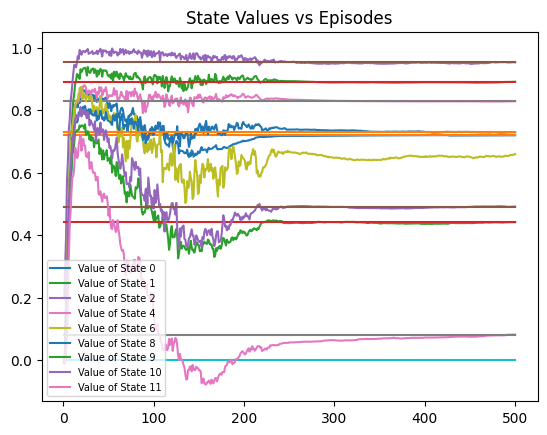

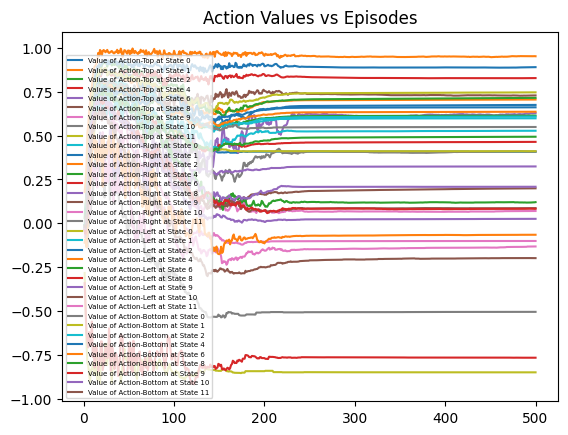

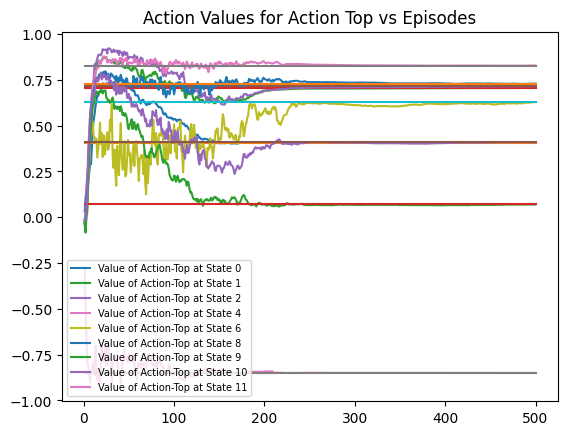

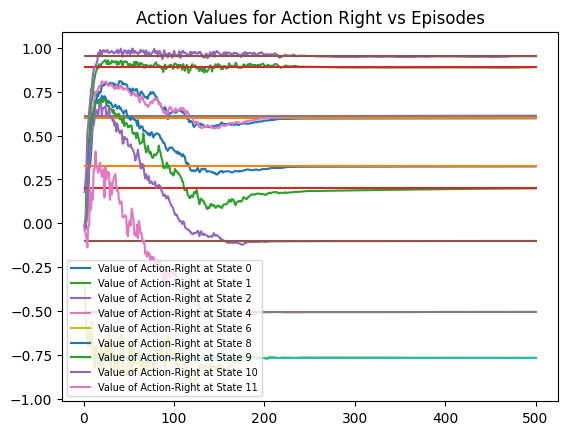

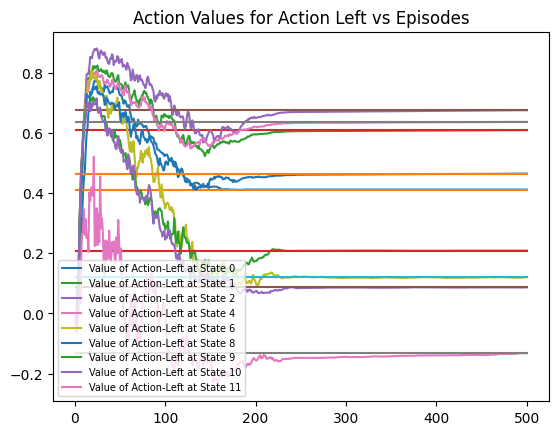

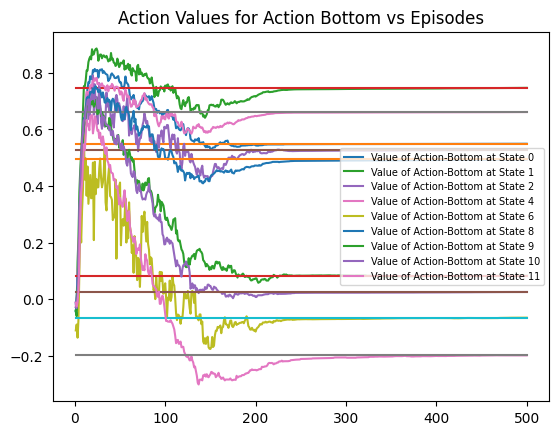

In [ ]:
plotV(TrajectorySampling)

Final policy after Trajectory Sampling

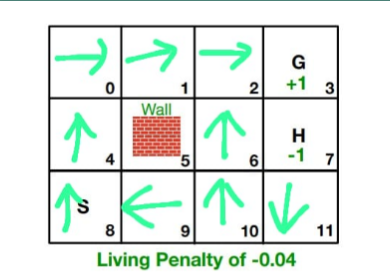

**bold text**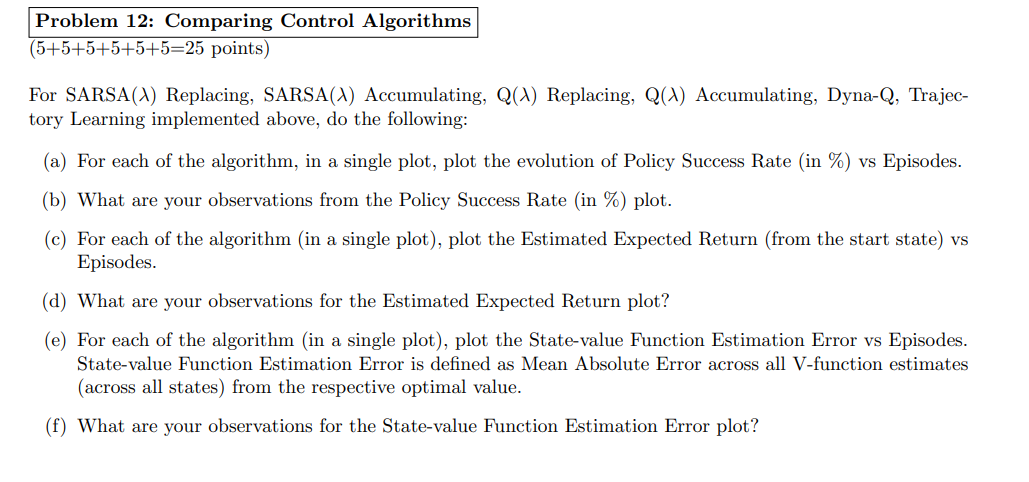

In [ ]:
getPolicySuccessRate(env, TrajectorySampling(env)[2])

97.5